In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os

In [2]:
# importing data
bankdata = pd.read_csv("customer_bank_marketing_data.csv")
bankdata

,age,job,marital,education,default,balance,housing,loan,deposit_num
0,59,administrative,married,secondary,no,2343,yes,no,1
1,56,administrative,married,secondary,no,45,no,no,1
2,41,technician,married,secondary,no,1270,yes,no,1
3,55,services,married,secondary,no,2476,yes,no,1
4,54,administrative,married,tertiary,no,184,no,no,1
...,...,...,...,...,...,...,...,...,...
45202,59,management,married,tertiary,no,138,yes,yes,0
45203,37,management,married,tertiary,no,1428,no,no,0
45204,34,blue-collar,single,secondary,no,1475,yes,no,0
45205,57,blue-collar,married,secondary,no,668,no,no,0


## One Hot Encoding

In [3]:
# separate categorical columns out
cols = bankdata.columns
num_cols = bankdata._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

for var in cat_cols:
    bankdata = pd.concat([bankdata.drop(var, axis=1), pd.get_dummies(bankdata[var], prefix=var, prefix_sep='_', drop_first=True, dummy_na=False, dtype=int)], axis=1)
bankdata

,age,balance,deposit_num,housing_yes,default_yes,education_secondary,education_tertiary,education_unknown,loan_yes,job_blue-collar,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
0,59,2343,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,56,45,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,1270,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,55,2476,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,54,184,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,59,138,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
45203,37,1428,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
45204,34,1475,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
45205,57,668,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [4]:
print("number of no deposit: ", bankdata[bankdata['deposit_num'] == 0].shape[0])
print("number of deposit: ", bankdata[bankdata['deposit_num'] == 1].shape[0])

number of no deposit:  39918
number of deposit:  5289


As we can see, there is an imbalanced between the number of positive and negative results of depopsit. We need to address this imbalance before proceeding. 

In [5]:
# address class imbalance by oversampling the minority class in the dataset, 
# ensuring that both classes are represented equally in the resampled data.

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

x = bankdata.drop('deposit_num', axis = 1)
y = bankdata['deposit_num']

x_resampled, y_resampled = smote.fit_resample(x, y)


# Machine Learning Model

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

### All Features with Logistic Regression 

In [16]:

x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size = 0.3, random_state = 40)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LogisticRegression(random_state = 40, max_iter=1000)
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

In [17]:
print('Report:\n',classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_pred,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, x, y, cv=5))

Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81     11957
           1       0.83      0.78      0.80     11994

    accuracy                           0.81     23951
   macro avg       0.81      0.81      0.81     23951
weighted avg       0.81      0.81      0.81     23951

F1 Score: 0.8029522828698935
confusion Matrix:
 [[10003  2638]
 [ 1954  9356]]
cross validation: [0.88299049 0.88287989 0.88297755 0.88275633 0.88275633]


### Using RFE

In [18]:
# Using Rfe
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(x_train,y_train)

print(x_train.columns[rfe.support_])
cols = x_train.columns[rfe.support_]
lr.fit(x_train[cols],y_train)
y_pred2 = lr.predict(x_test[cols])

Index(['housing_yes', 'default_yes', 'education_unknown', 'loan_yes',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')


In [19]:
print('Report:\n',classification_report(y_test, y_pred2))
print("F1 Score:",f1_score(y_pred2,y_test))
print('AUC score:',roc_auc_score(y_test,y_pred2))
print('confusion Matrix:\n',confusion_matrix(y_pred2,y_test))
print('kfold cross validation:\n',cross_val_score(lr, x, y, cv=5))
print("Acurracy :::>",accuracy_score(y_pred2,y_test))

Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79     11957
           1       0.79      0.79      0.79     11994

    accuracy                           0.79     23951
   macro avg       0.79      0.79      0.79     23951
weighted avg       0.79      0.79      0.79     23951

F1 Score: 0.7898755186721992
AUC score: 0.7885605984950045
confusion Matrix:
 [[9369 2476]
 [2588 9518]]
kfold cross validation:
 [0.88299049 0.88287989 0.88297755 0.88275633 0.88275633]
Acurracy :::> 0.7885683270009602


### Feature Importance

In [20]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lr)
smf.fit(x_train,y_train)
features = smf.get_support()
feature_name = x_train.columns[features]
feature_name

Index(['education_unknown', 'loan_yes', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_self-employed', 'job_services',
       'job_technician', 'job_unemployed'],
      dtype='object')

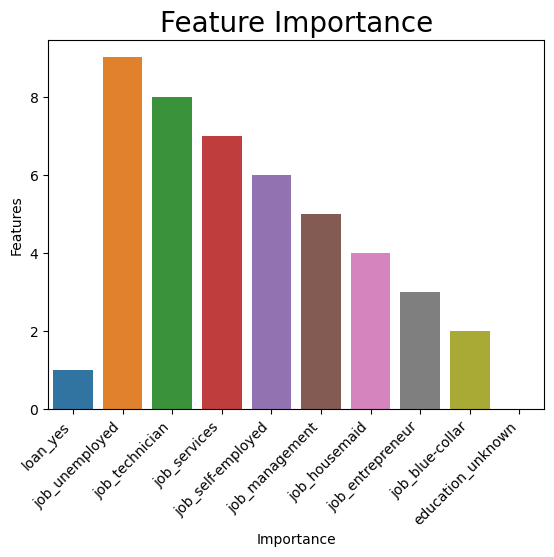

In [27]:
importances=feature_name
feature_importances=pd.Series(importances).sort_values(ascending=False)
ax = sb.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set plot title and labels
plt.title('Feature Importance', size=20)
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()

## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size = 0.3,random_state=40)

rfc = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=101,max_leaf_nodes=50)
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_test)

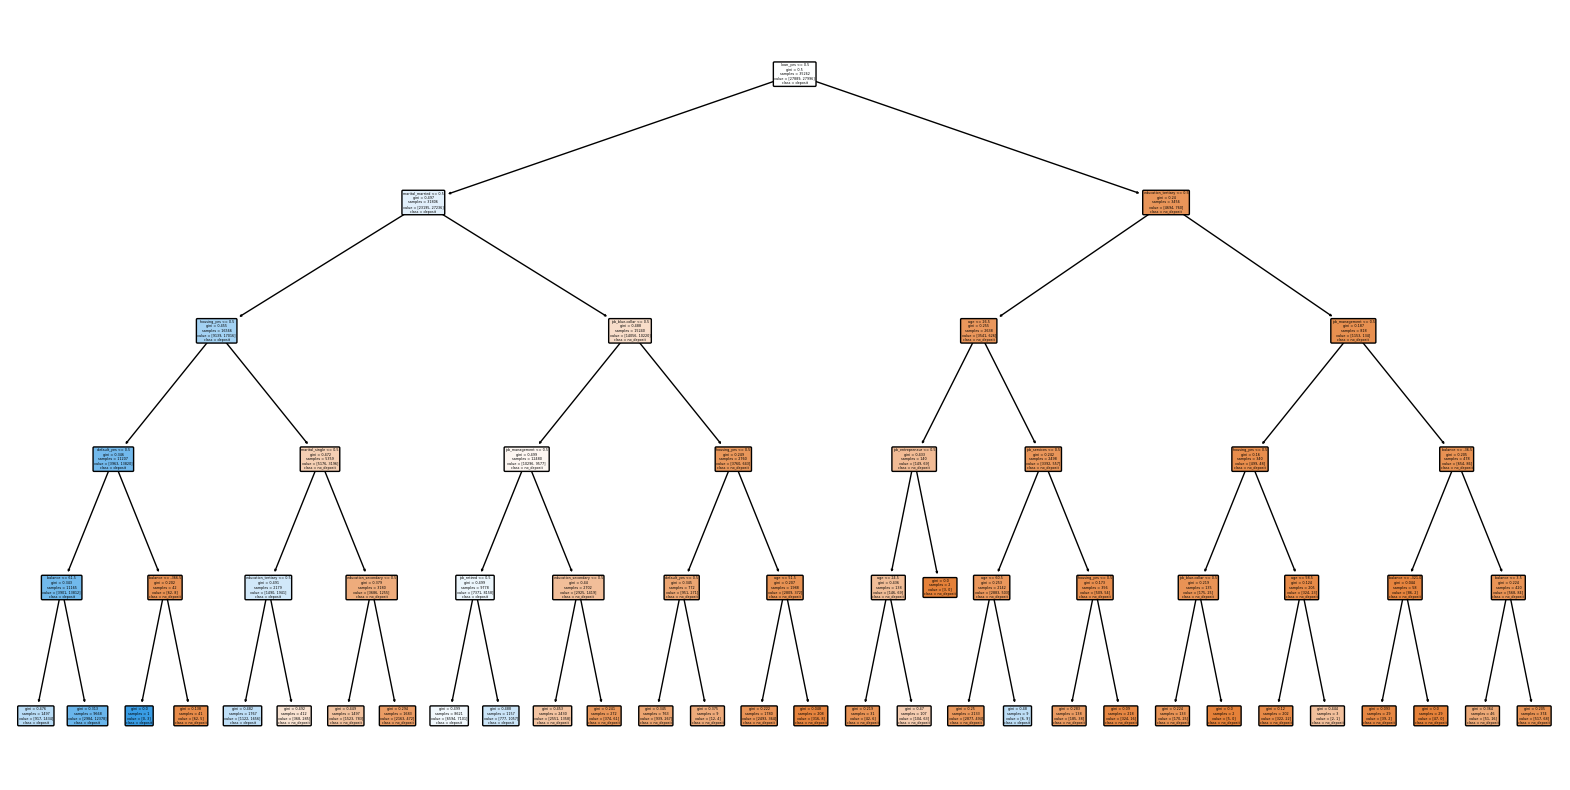

In [23]:
from sklearn.tree import plot_tree

estimator = rfc.estimators_[5]

# Convert the Index object to a list
feature_names_list = list(x_train.columns)

# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(estimator, 
          feature_names=feature_names_list,  # Use the list of feature names
          class_names=['no_deposit', 'deposit'],  # Specify class names
          filled=True, rounded=True)
plt.show()

In [24]:
print('Report:\n',classification_report(y_test, y_pred1))
print("F1 Score:",f1_score(y_pred1,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred1,y_test))
print('cross validation:',cross_val_score(rfc, x, y, cv=5))
print('AUC score:',roc_auc_score(y_test,y_pred))
print("Acurracy :::>",accuracy_score(y_pred,y_test))

Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77     11957
           1       0.77      0.78      0.77     11994

    accuracy                           0.77     23951
   macro avg       0.77      0.77      0.77     23951
weighted avg       0.77      0.77      0.77     23951

F1 Score: 0.7738929661086831
confusion Matrix:
 [[9082 2609]
 [2875 9385]]
cross validation: [0.88299049 0.88299049 0.88297755 0.88297755 0.8485787 ]
AUC score: 0.8083188886127155
Acurracy :::> 0.8082752285917081


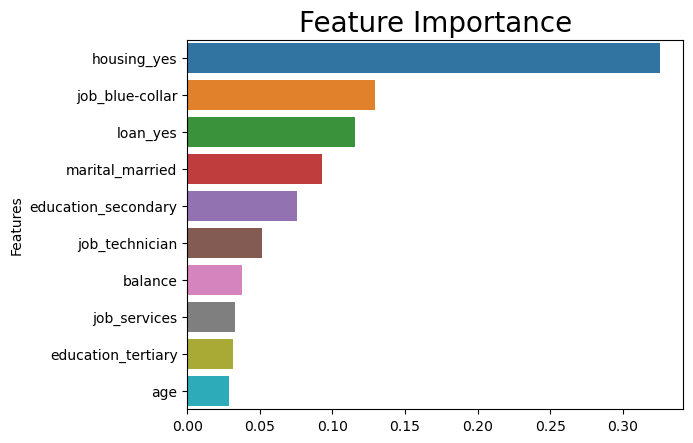

In [25]:
importances=rfc.feature_importances_
feature_importances=pd.Series(importances, index=x_train.columns).sort_values(ascending=False)
sb.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()